In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("../assets/thorino.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)

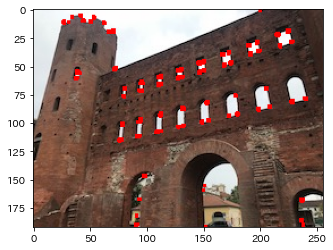

In [3]:
# find Harris corners
img1 = img.copy()
dst = cv2.cornerHarris(gray,3,3,0.04)
dst = cv2.dilate(dst, None)
img1[dst>0.1*dst.max()] = [0,0,255]
plt.imshow(img1[:,:,::-1])

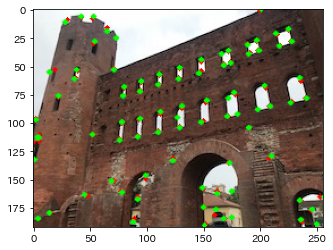

In [4]:
img2 = img.copy()
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,3,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray, np.float32(centroids), (5,5), (-1,-1), criteria)

# Now draw them
res = np.hstack((centroids, corners))
res = np.int0(res)
for (x1,y1,x2,y2) in res:
    cv2.circle(img,(x1,y1),2,(0,0,255),-1)
    cv2.drawMarker(img, (x2,y2), (0,255,0), markerType=cv2.MARKER_CROSS, 
                markerSize=2, thickness=2, line_type=cv2.LINE_AA)

plt.imshow(img[:,:,::-1])

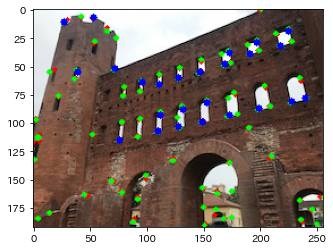

In [5]:
img3 = img.copy()
corners = cv2.goodFeaturesToTrack(gray, 25, 0.01, 10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(img3, (x,y), 3,255, -1)
plt.imshow(img3[:,:,::-1])